# Introduction to Jupyter Notebooks

## A Data Tables session at csv,conv,v3 

**Facilitator**: Dan Fowler, Developer Advocate at [Open Knowledge International](https://okfn.org/)

**Venue**: [csv,conf,v3](https://csvconf.com/) in Portland, Oregon 2-3 May 2017

**Description**: Jupyter Notebooks are a convenient way to experiment, share code and context, and collaborate on data analysis.  This session is part of Data Tables.  It is an introduction to the use of Jupyter Notebooks inspired by [Micheleen Harris's talk last year](https://csvconf.com/2016/#mharris) at csv,conv,v2 ([slides here](https://github.com/michhar/csvconf2016)).  

**Session Time**: TBD

**Goals**:

- Introduce and motivate Jupyter Notebooks
- Help install on attendees' systems
- Walk through basic usage

![OKI](https://a.okfn.org/img/oki/landscape-rgb-234x61.png)


## Data Tables

A dedicated space at csv,conf,v3 for hacking on data and learning about tools

Learn more: https://github.com/csvconf/data-tables.csv

![img](data-tables.png)

## What is a Jupyter Notebook?

- A Jupyter (formerly IPython) Notebook is a way of packaging code, images, rendered graphs, and commentary in a convenient, sharable format.  
- Jupyter Notebooks allow users to share analysis in a visually rich way.  
  - You can share the generated `*.ipynb` file.  GitHub will also automatically render uploaded notebooks (see [NBViewer](http://nbviewer.jupyter.org/))
- Code is interactive and executable
  - Executed code cells (including simple variables) render output (if any) directly to the notebook
  - Code and rendered output is stored in a notebook file (`introduction-to-jupyter-notebooks.ipynb`)
- Default language supported is Python
  - Additional language support provided by *kernels* (50+)
  
## Example

For this notebook, we will load csv,conf,v2 and csv,conf,v3 speakers CSV files in separate code cells using pandas.  We will also scrape csv,conf,v1 speaker information from the website.  This should show how easy it is to perform basic data processing tasks with Jupyter Notebooks.

What follows this "cell" (the basic unit of a Jupyter Notebook) is another cell containing executable Python code.  After clicking within, shift+enter executes and renders the output in space below.

In [1]:
# Python code cell; after typing press shift+enter to execute

# Load pandas and read in a CSV.  All the variables are accessible throughout the notebook in the cells below.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/csvconf/csvconf.com/gh-pages/_data/2017_speakers.csv')

# Add a year column whose value is always '2017'.
df['year'] = '2017'

# Preview the first few rows by calling .head() on the dataframe
df.head()

,id,name,title,img,twitter,slides_url,abstract,year
0,ebecker,Erin Becker,Empowering people by democratizing data skills,NaN,ErinSBecker,NaN,"Although petabytes of data are now available,...",2017
1,mhertzfeld,Michelle Hertzfeld,Designing with data: prototyping at the speed ...,https://michellehertzfeld.com/assets/img/miche...,meiqimichelle,NaN,We've all done it. Mocked up a perfect dashboa...,2017
2,dwhalen,Danny Whalen,The evolution of a GTFS data pipeline,https://pbs.twimg.com/profile_images/507955752...,invisiblefunnel,NaN,The General Transit Feed Specification is one ...,2017
3,dbrawley,Dare Anne Brawley,Urban/Information: Mapping the US Postal Servi...,http://c4sr.columbia.edu/sites/default/files/s...,darebrawley,NaN,"In this talk I will use one dataset, and 165 m...",2017
4,hazhar,Hamdan Azhar,"✊s, 🌹s, and major 🔑s: Emoji data science & jou...",http://www.hamdanazhar.com/uploads/2/5/5/1/255...,hamdanazhar,NaN,NaN,2017


As you can see, we get a very interactive and rich rendering of the dataframe.  We can inspect this dataframe very easily.

In [2]:
# How many records in the dataframe?  As you can see, the variable 'df' is still accessible.
len(df)

45

In [3]:
# Let's load last year's speakers, too.  

df2 = pd.read_csv('https://raw.githubusercontent.com/csvconf/csvconf.com/gh-pages/_data/speakers.csv')

# Add a year column whose value is always '2016'.
df2['year'] = '2016'

# Let's append the contents of this dataframe (df2) to the one created in the above cell.
df = df.append(df2)

# How many records are now in the dataframe?
len(df)

81

### Using 

After this motivating example, let's take a quick break and demonstrate how we can actually start using Jupyter Notebooks on your machine.

#### Try online

You can play around with Jupyter notebooks here:

https://try.jupyter.org/

Microsoft provides a hosted service for creating and collaborating on notebooks: 

https://notebooks.azure.com/

#### Local install

Jupyter Notebooks run in a web browser, but depend on a running Python environment on your machine.  If you have Python set up already, you can install via pip, but Jupyter recommends Conda.

##### Conda (recommended)

https://www.continuum.io/downloads

##### pip

```
pip3 install jupyter
```

#### Running

After installing, you can start a session by typing:

```
jupyter notebook
```

You can choose the browser as well.  Example:

```
jupyter notebook --browser=chrome
```

## Basic use

### Help

You can get help for unfamiliar (or familiar!) commands directly within Jupyter by appending a question mark

In [4]:
pd.read_csv?

![Help!](help.png)

### Autocomplete

Jupyter Notebooks also support autocomplete.

![Autocomplete](autocomplete.png)

### Switching Cell Type

Each cell has a type.  Some cells are for code, others are for comments.  The way to add Markdown comments instead of code is to change the cell type.

![Cell type](cell-type.png)


## Continuing the Example

### Creating a chart

Let's create a chart to compare the average length of csv,conf talk titles from 2014 to 2017.  Have they gotten longer or shorter?

To do this, we can also need add the 2014 data.  Since we don't have a handy CSV to work with, we need to scrape the data from the original website using [BeautifulSoup](https://pypi.python.org/pypi/beautifulsoup4) 🍲.

In [5]:
from bs4 import BeautifulSoup
import urllib
url = 'https://csvconf.com/2014/'
page = page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "html5lib")

# Create a variable to fill in with scraped data 
d = {"name": [], "title": [], "year": []}

# 
talk_elements = soup.findAll("li", { "class" : "features-item" })
for talk_element in talk_elements:
    d['name'].append(talk_element.find("h4").text)
    d['title'].append(talk_element.find("h3").text)
    d['year'].append('2014')
    
df = df.append(pd.DataFrame(data=d))

In [6]:
# For each record, let's apply the function len (length) to the 'title' field and
# store the output in a new field called 'title_length'. Pandas makes this easy.

df['title_length'] = df['title'].apply(len)
df.head()

,abstract,id,img,name,slides_url,title,twitter,year,title_length
0,"Although petabytes of data are now available,...",ebecker,NaN,Erin Becker,NaN,Empowering people by democratizing data skills,ErinSBecker,2017,46
1,We've all done it. Mocked up a perfect dashboa...,mhertzfeld,https://michellehertzfeld.com/assets/img/miche...,Michelle Hertzfeld,NaN,Designing with data: prototyping at the speed ...,meiqimichelle,2017,57
2,The General Transit Feed Specification is one ...,dwhalen,https://pbs.twimg.com/profile_images/507955752...,Danny Whalen,NaN,The evolution of a GTFS data pipeline,invisiblefunnel,2017,37
3,"In this talk I will use one dataset, and 165 m...",dbrawley,http://c4sr.columbia.edu/sites/default/files/s...,Dare Anne Brawley,NaN,Urban/Information: Mapping the US Postal Servi...,darebrawley,2017,63
4,NaN,hazhar,http://www.hamdanazhar.com/uploads/2/5/5/1/255...,Hamdan Azhar,NaN,"✊s, 🌹s, and major 🔑s: Emoji data science & jou...",hamdanazhar,2017,53


In [7]:
# We generate group the dataset by year and generate the mean values in the 'title_length' field.

df.groupby(['year'])['title_length'].mean()

year
2014    42.300000
2016    51.027778
2017    54.088889
Name: title_length, dtype: float64

It is worth now exploring ✨ magic ✨ before the next step.

![Magic!](https://media1.giphy.com/media/ujUdrdpX7Ok5W/giphy.gif)



### Magics

The IPython kernel supports a number of "magic" commands (*magics*) that do special things either at the cell level or at the line level.  In order to plot seamlessly, we can take advantage of the line-level `%matplotlib` magic.

You can get an idea of the different magics available to the kernel by running `%lsmagic`

In [8]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

`%matplotlib inline` is the magic we want.  It allows us to automatically render matplotlib charts via pandas.

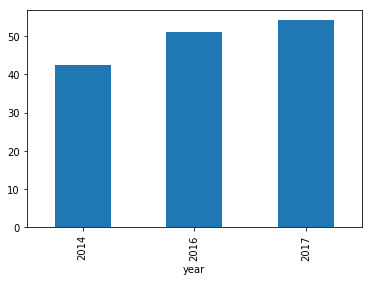

In [9]:
%matplotlib inline

df.groupby(['year'])['title_length'].mean().plot.bar()

## Other Fancy Things

### Using Another Language

Although Jupyter Notebook is written in Python, it supports other languages via language-specific "kernels".  You can choose the kernel with which you are running your notebook when you create it.

![Kernels](kernels.png)

#### Installing kernels

For R, you need to install [IRKernel](https://irkernel.github.io/installation/).

#### Running R and Python side by side

You can actually run R and Python side by side in the IPython kernel by using a *magic* to load a special extension that provides a Python interface to R (Note: you need to install [rpy2](https://rpy2.bitbucket.io/) for this to work.

```
pip3 install rpy2
```

Once you have done this, you can use the `%load_ext` magic to lead the `rpy2.ipython` extension.

In [10]:
%load_ext rpy2.ipython

In [11]:
%%R

x <- "I survived csv,conf,v3!"
x

[1] "I survived csv,conf,v3!"


#### Running JavaScript

Using the `%%javascript` magic, you can just write JavaScript.

In [12]:
%%javascript

/* Running JavaScript */

var x = "I survived csv,conf,v3!";
element.text(x);

<IPython.core.display.Javascript object>

##### Ignoring Checkpoints

This is not fancy, but can help when you are working with git.  On manual save, Jupyter Notebooks tend to create files in a directory called `.ipynb_checkpoints`.  You might want to add this to your `.gitignore` file:

```
# .gitignore

.ipynb_checkpoints
```

# Sources

- https://github.com/michhar/useR2016-tutorial-jupyter
- http://blog.revolutionanalytics.com/2016/01/pipelining-r-python.html
- https://notebooks.azure.com
- https://www.datacamp.com/community/blog/jupyter-notebook-r#gs.bRi_RiA
- https://michhar.github.io/posts/jupyter-and-beaker-make-a-case